# Import necessary libraries

In [744]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pydot
import json
import os
import pygraphviz

# Open files

In [745]:
files = os.listdir('parsed_data/')
files

['Colfer Eoin. Artemis Fowl.json',
 '.DS_Store',
 'Colfer Eoin. Artemis Fowl. The Opal Deception.json',
 'Colfer Eoin. Artemis Fowl. The Lost Colony.json',
 'Colfer Eoin. Artemis Fowl: The Eternity Code.json',
 'Colfer Eoin. Artemis Fowl and the Atlantis Complex.json',
 'Colfer Eoin. Artemis Fowl: The Time Paradox.json',
 'Colfer Eoin. Artemis Fowl. The Arctic Incident.json']

In [746]:
files.remove('.DS_Store')

In [747]:
files

['Colfer Eoin. Artemis Fowl.json',
 'Colfer Eoin. Artemis Fowl. The Opal Deception.json',
 'Colfer Eoin. Artemis Fowl. The Lost Colony.json',
 'Colfer Eoin. Artemis Fowl: The Eternity Code.json',
 'Colfer Eoin. Artemis Fowl and the Atlantis Complex.json',
 'Colfer Eoin. Artemis Fowl: The Time Paradox.json',
 'Colfer Eoin. Artemis Fowl. The Arctic Incident.json']

# Convert data into a _networkx_ tree

In [748]:
def get_tree(data):
    G = nx.Graph()
    G.add_node('Text')
    
    sentiment = []
    edgelist = []
    root_to_chapter = []

    for chapter in json_data['text']['chapters']:
        G.add_node(chapter['chapter_title'])
        G.add_edge(chapter['chapter_title'], 'Text')
        root_to_chapter.append(('Text', chapter['chapter_title']))
        par_num = 1
        sentiment.append(chapter['chapter_sentiment'])
        for paragraph in chapter['paragraphs']:
            G.add_node(str(chapter['chapter_number']) +  ' paragraph ' + str(par_num))
            G.add_edge(str(chapter['chapter_number']) +  ' paragraph ' + str(par_num), chapter['chapter_title'])
            sent_num = 1
            for sentence in paragraph['sentences']:
                G.add_node(str(chapter['chapter_number']) +  ' paragraph ' + str(par_num) + str(sent_num))
                G.add_edge(str(chapter['chapter_number']) +  ' paragraph ' + str(par_num) + str(sent_num), str(chapter['chapter_number']) +  ' paragraph ' + str(par_num))
                edgelist.append((str(chapter['chapter_number']) +  ' paragraph ' + str(par_num), str(chapter['chapter_number']) +  ' paragraph ' + str(par_num) + str(sent_num)))
                sent_num += 1
            par_num += 1
    return G, sentiment, root_to_chapter, edgelist

# Generate graphs

In [749]:
def generate_and_save_graph(data, G, root_to_chapter, edgelist, path):
    plt.figure(figsize=(10, 10))

    pos = graphviz_layout(G, prog="twopi", root=0)

    nx.draw_networkx_nodes(G, pos,node_size=0, alpha=0)
    nx.draw_networkx_edges(G, pos, width=0.1, alpha=1)
    nx.draw_networkx_edges(G, pos, edgelist=root_to_chapter,
                           width=0.5, alpha=0.5)

    nx.draw_networkx_edges(G, pos,
                           edgelist=edgelist,
                           width=0.3, alpha=0.2)
    plt.axis('off')
    plt.savefig(path + '/' + data['title'] + '.png')

# Generate gradient

In [750]:
def create_gradient(color1, color2, mix):
    color1=np.array(mpl.colors.to_rgb(color1))
    color2=np.array(mpl.colors.to_rgb(color2))
    return mpl.colors.to_hex((1-mix)*color1 + mix*color2)

In [751]:
def map_colors(sentiment, pos, neg, neu):
    colors = []
    for i in sentiment:
        if i < -0.1:
            colors.append(neg)
        elif i > 0.1:
            colors.append(pos)
        else:
            colors.append(neu)
    return colors[::-1]

In [752]:
def generate_and_save_gradient(sentiment, path, negative_col, neutral_col, positive_col):
   # colors = map_colors(sentiment, pos='#A85F9E', neg='#5B4A79', neu='#825395')
    
    colors = map_colors(sentiment, pos=positive_col, neg=negative_col, neu=neutral_col)
    
    colors = map_colors(sentiment, pos='#A85F9E', neg='#5B4A79', neu='#825395')


    fig, ax = plt.subplots(figsize=(15, 10))

    coord = 1
    for i in range(len(colors)):
        if i == len(colors) - 1:
            break
        if i == 0 or i + 1 == len(colors) - 1:
            m = int(1.5 * int(1.5 * n/len(colors)))
        else:
            m = int(1.5 * int(n/len(colors)))
        c1 = colors[i]
        c2 = colors[i+1]
        for x in range(coord, coord+m):
            ax.axhline(x, color=create_gradient(c1,c2,(x-coord)/m), linewidth=7)
        coord += m + 7

    plt.axis('off')
    plt.savefig(path + '/' + json_data['title'] + '_gradient.png')

# Save graphs and backgrounds

In [753]:
# Presents how books are ordered in the series
books_order = {1: 'Artemis Fowl', 2: 'Artemis Fowl and the Arctic Incident',
               3: 'Artemis Fowl and the Eternity Code', 4: 'Artemis Fowl and the Opal Deception',
               5: 'Artemis Fowl and the Lost Colony', 6: 'Artemis Fowl and the Time Paradox',
               7: 'Artemis Fowl and the Atlantis Complex'}

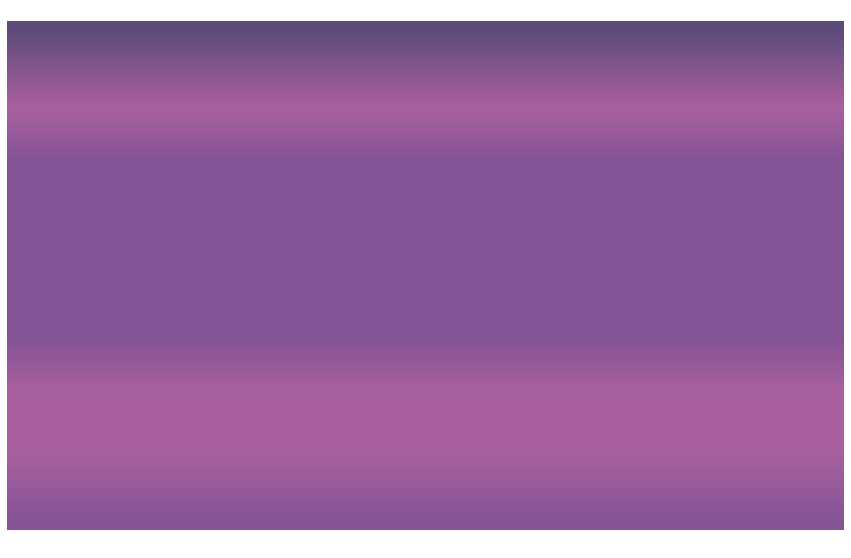

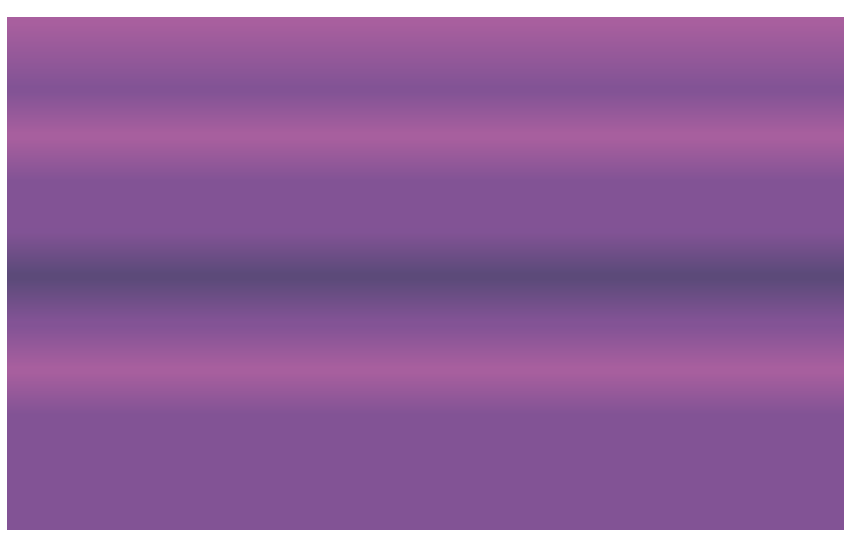

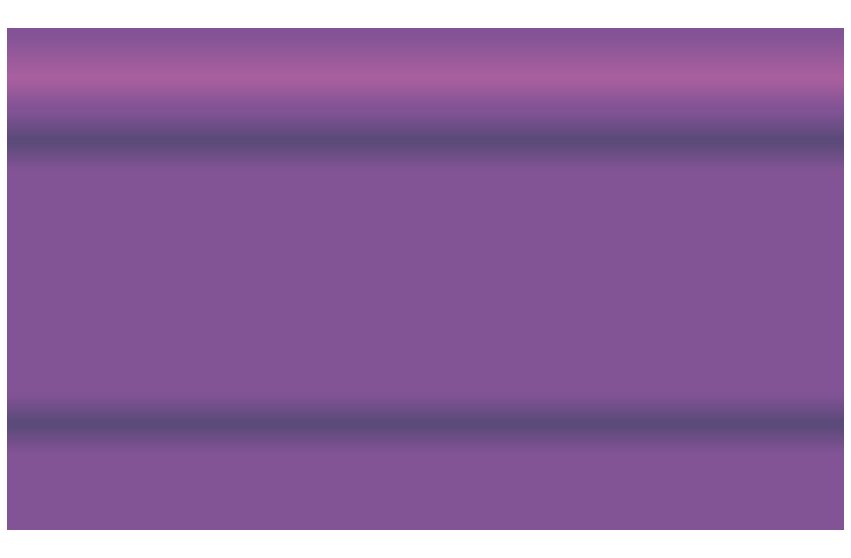

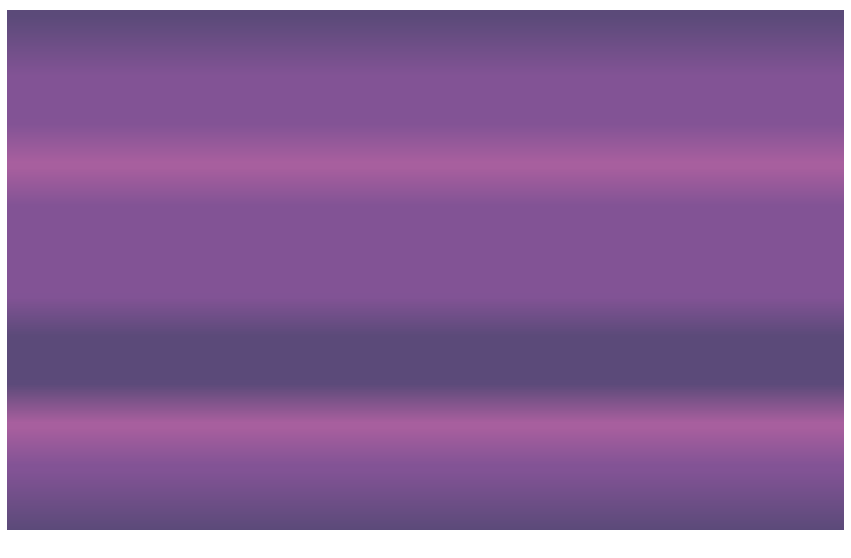

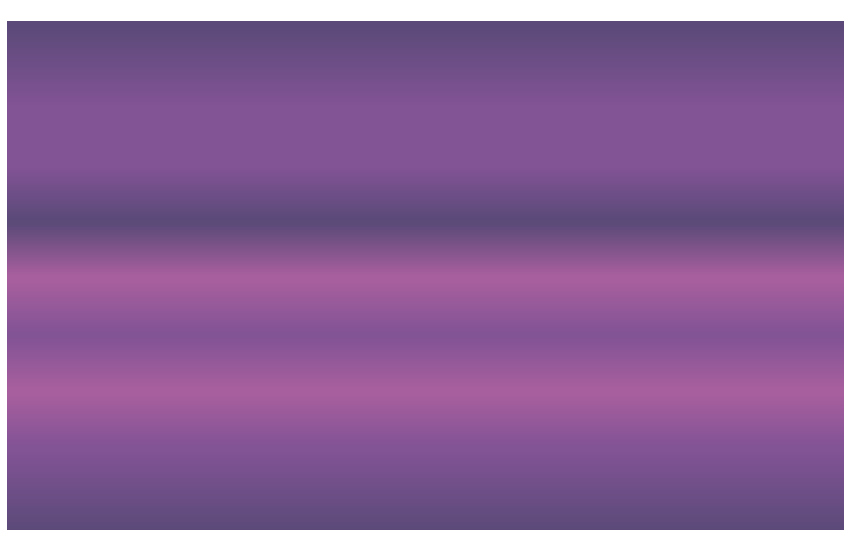

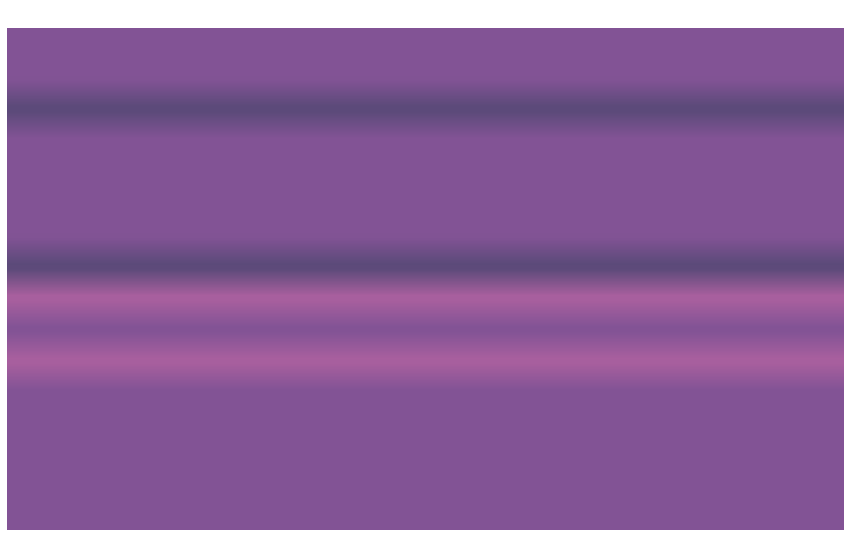

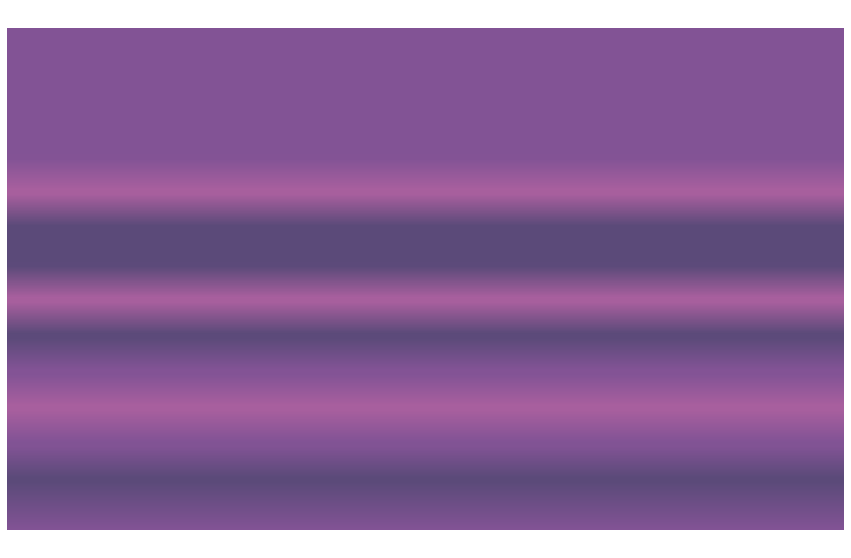

In [755]:
for file in files:
    with open('parsed_data/' + file) as f:
        json_data = json.loads(f.read())
    book_name = json_data['title'].replace('Colfer Eoin. ', '').replace('.', ' and').replace(':', ' and').replace('The', 'the')
    book_number = [key for key,value in books_order.items() if value == book_name][0]
    path = 'radial_tree/' + str(book_number) + ' ' + book_name
    if not os.path.exists(path):
        os.mkdir(path)
    G, sentiment, root_to_chapter, edgelist = get_tree(json_data)
    #generate_and_save_graph(json_data, G, root_to_chapter, edgelist, path)
    generate_and_save_gradient(sentiment, path, negative_col='#5B4A79', neutral_col='#825395', positive_col='#A85F9E')

# Test graphs

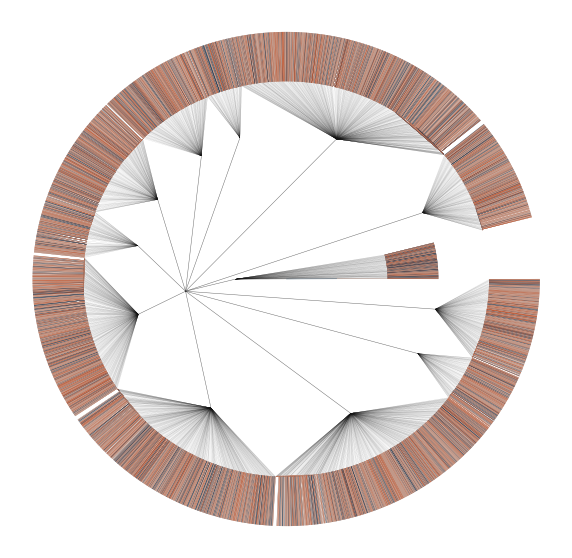

In [541]:
plt.figure(figsize=(10, 10))

pos = graphviz_layout(G, prog="twopi", root=0)
# nodes
nx.draw_networkx_nodes(G, pos,node_size=0, alpha=0)

# edges
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=root_to_chapter,
                       width=0.5, alpha=0.5)

#color = ['#F2784B' for i in range(len(edgelist) - 200)] + ['#5E848C' for j in range(200)]
#color = map_colors(sentiment, pos='#8E6D82', neg='#365073', neu='#DFA5A9')
#color = map_colors(sentiment, pos='#F2784B', neg='#5E848C', neu='#F29D52')
#color = map_colors(sentiment, pos='#C5690C', neg='#2E78B3', neu='#FBBF74')
#color = map_colors(sentiment, pos='#BE363A', neg='#2E78B3', neu='#F4AE91')
#color = map_colors(sentiment, pos1='#EC9D3E', pos2='#C5690C', neg1='#2E78B3', neg2='#5DA2CB', neu='#FBCA8B')
#color = map_colors(sentiment, pos='#F25430', neg='#0F3BBF', neu='#BF9445')
#color = map_colors(sentiment, pos='#D95204', neg='#03588C', neu='#F2811D')
#color = map_colors(sentiment, pos='#D95204', neg='#03588C', neu='#F2B705')
color = map_colors(sentiment, pos='#BF491F', neg='#1E3E59', neu='#BF8D7A')




nx.draw_networkx_edges(G, pos,
                       edgelist=edgelist,
                       width=0.3, alpha=1, edge_color=color)

plt.axis('off')
plt.show()

In [737]:
with open('parsed_data/' + files[6]) as f:
    json_data = json.loads(f.read())

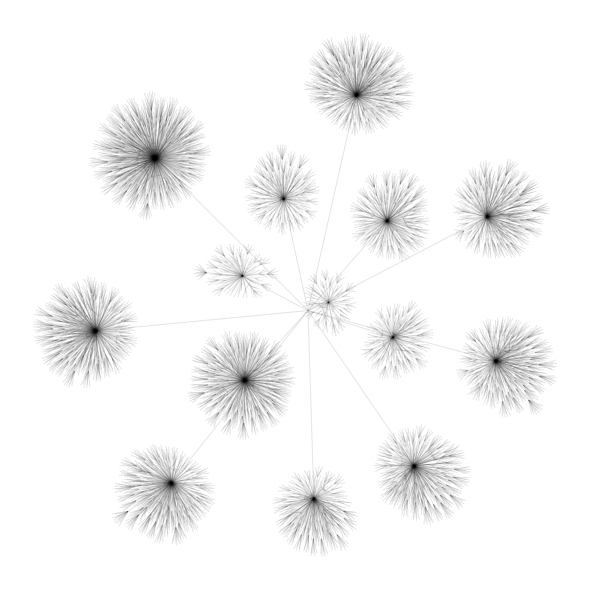

In [738]:
G, sentiment, root_to_chapter, edgelist = get_tree(json_data)

#  ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’

#print("graph has %d nodes with %d edges"
#      % (nx.number_of_nodes(G), nx.number_of_edges(G)))
#print(nx.number_connected_components(G), "connected components")

plt.figure(figsize=(8, 8))
# use graphviz to find radial layout
pos = graphviz_layout(G, prog='sfdp', root=0)
#pos=nx.circular_layout(G)
# draw nodes, coloring by rtt ping time
nx.draw(G, pos,
        with_labels=False,
        alpha=0.1,
        node_size=0)
# adjust the plot limits
#xmax = 1.02 * max(xx for xx, yy in pos.values())
#ymax = 1.02 * max(yy for xx, yy in pos.values())
#plt.xlim(0, xmax)
#plt.ylim(0, ymax)
plt.axis('off')
plt.show()

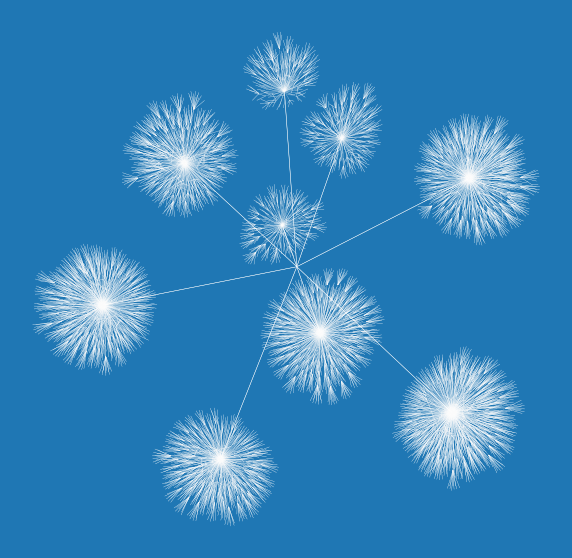

In [736]:
fig = plt.figure(figsize=(10, 10))

pos = graphviz_layout(G, prog="sfdp", root=0)
# nodes
nx.draw_networkx_nodes(G, pos,node_size=0, alpha=0, node_color='w')

# edges
nx.draw_networkx_edges(G, pos, width=0.2, alpha=1, edge_color='w')
nx.draw_networkx_edges(G, pos, edgelist=root_to_chapter,
                       width=0.5, alpha=1, edge_color='w')

nx.draw_networkx_edges(G, pos,
                       edgelist=edgelist,
                       width=0.3, alpha=0.5, edge_color='w')

fig.set_facecolor("#1f77b4")
plt.axis('off')
plt.show()

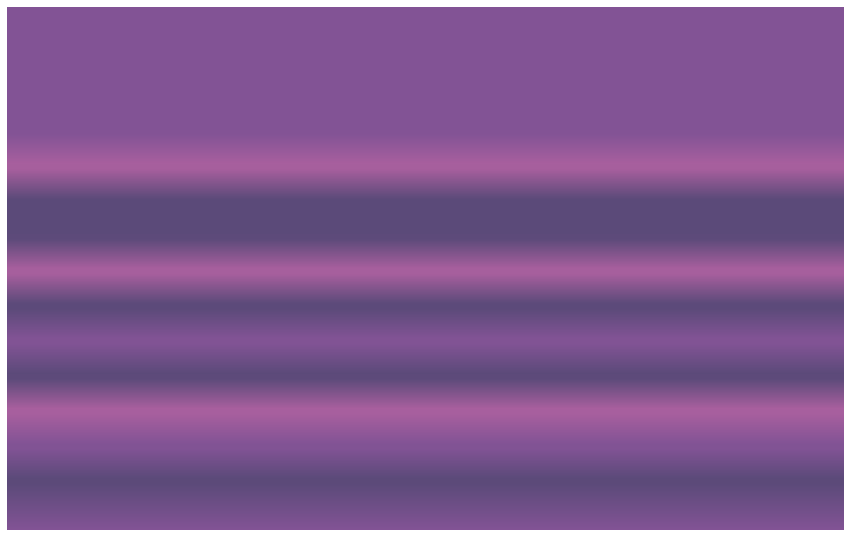

In [643]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#1f77b4' #blue
c2='green' #green
n=500
#[-0.296, 0.6369, 0.0, 0.0, 0.0, 0.0, 0.6369, 0.2732, 0.0]
#colors = ['#2B04E8', '#6A12E8', '#8B09FF', '#8B09FF', '#8B09FF', '#8B09FF', '#6A12E8', '#6A12E8', '#8B09FF']
#colors = ['#5E848C', '#F2784B', '#F29D52', '#F29D52', '#F29D52', '#F29D52', '#F2784B', '#F2784B', '#F29D52']
#colors = ['#455973', '#D96B43', '#BFA575', '#BFA575', '#BFA575', '#BFA575', '#D96B43', '#D96B43', '#BFA575']


def map_colors(sentiment, pos, neg, neu):
    colors = []
    for i in sentiment:
        if i < -0.1:
            colors.append(neg)
        elif i > 0.1:
            colors.append(pos)
        else:
            colors.append(neu)
    return colors[::-1]
        
#colors = map_colors(sentiment, pos='#8E6D82', neg='#365073', neu='#DFA5A9')
#colors = map_colors(sentiment, pos='#F2784B', neg='#5E848C', neu='#F29D52')
#colors = map_colors(sentiment, pos='#F2784B', neg='#5E848C', neu='#F29D52')
##colors = map_colors(sentiment, pos='#8E6D82', neg='#365073', neu='#DFA5A9')
#colors = map_colors(sentiment, pos='#F2784B', neg='#5E848C', neu='#F29D52')
#colors = map_colors(sentiment, pos='#C5690C', neg='#2E78B3', neu='#FBBF74')
#colors = map_colors(sentiment, pos='#BE363A', neg='#2E78B3', neu='#F4AE91')
#colors = map_colors(sentiment, pos='#F25430', neg='#0F3BBF', neu='#BF9445')
#colors = map_colors(sentiment, pos='#D95204', neg='#03588C', neu='#F2811D')
#colors = map_colors(sentiment, pos='#D95204', neg='#03588C', neu='#F2B705')
colors = map_colors(sentiment, pos='#A85F9E', neg='#5B4A79', neu='#825395')


fig, ax = plt.subplots(figsize=(15, 10))

coord = 1
for i in range(len(colors)):
    if i == len(colors) - 1:
        break
    if i == 0 or i + 1 == len(colors) - 1:
        m = int(1.5 * int(1.5 * n/len(colors)))
    else:
        m = int(1.5 * int(n/len(colors)))
    c1 = colors[i]
    c2 = colors[i+1]
    for x in range(coord, coord+m):
        ax.axhline(x, color=colorFader(c1,c2,(x-coord)/m), linewidth=7)
    coord += m + 7

plt.axis('off')
plt.show()